In [2]:

from sklearn.metrics import jaccard_score
import pandas as pd
import numpy as np
import os

folder = os.path.join("/", "RanD", "CREMEv2_Result", "Reproducibility_Measurement", "Working", "traffic", "Final")
lst = os.listdir(folder)
print(lst)

del_cols_list = ["StartTime", "LastTime"]
combinations = []



ground_truth = pd.read_csv(os.path.join(folder, "final_clean_label_traffic_20230310.csv"))

sec_1 = pd.read_csv(os.path.join(folder, "final_clean_label_traffic_20230424.csv")) # Normal
sec_2 = pd.read_csv(os.path.join(folder, "final_clean_label_traffic_20230502.csv")) # 1 times 
sec_3 = pd.read_csv(os.path.join(folder, "final_clean_label_traffic_20230426.csv")) # 2 Times
sec_4 = pd.read_csv(os.path.join(folder, "final_clean_label_traffic_20230420.csv")) # 3 times


['final_clean_label_traffic_20230420.csv', 'final_clean_label_traffic_20230424.csv', 'final_clean_label_traffic_20230426.csv', 'final_clean_label_traffic_20230502.csv', 'final_clean_label_traffic_20230310.csv']


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

pca = PCA(n_components=2)

ground_truth_scaled = scaler.fit(ground_truth).transform(ground_truth)

sec_1_scaled = scaler.fit(sec_1).transform(sec_1)
sec_2_scaled = scaler.fit(sec_2).transform(sec_2)
sec_3_scaled = scaler.fit(sec_3).transform(sec_3)
sec_4_scaled = scaler.fit(sec_4).transform(sec_4)



In [4]:

ground_truth_covarianceMatrix = np.cov(np.transpose(np.array(ground_truth_scaled)))

sec_1_covarianceMatrix = np.cov(np.transpose(np.array(sec_1_scaled)))
sec_2_covarianceMatrix = np.cov(np.transpose(np.array(sec_2_scaled)))
sec_3_covarianceMatrix = np.cov(np.transpose(np.array(sec_3_scaled)))
sec_4_covarianceMatrix = np.cov(np.transpose(np.array(sec_4_scaled)))

pca_ground_truth = pca.fit(ground_truth_covarianceMatrix).transform(ground_truth_covarianceMatrix)

pca_sec_1 = pca.fit(sec_1_covarianceMatrix).transform(sec_1_covarianceMatrix)
pca_sec_2 = pca.fit(sec_2_covarianceMatrix).transform(sec_2_covarianceMatrix)
pca_sec_3 = pca.fit(sec_3_covarianceMatrix).transform(sec_3_covarianceMatrix)
pca_sec_4 = pca.fit(sec_4_covarianceMatrix).transform(sec_4_covarianceMatrix)

In [6]:
df_pca_ground_truth = pd.DataFrame(pca_ground_truth, columns =['comp1','comp2'])
df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)



df_pca_sec_1 = pd.DataFrame(pca_sec_1, columns =['comp1','comp2'])
df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)

df_pca_sec_2 = pd.DataFrame(pca_sec_2, columns =['comp1','comp2'])
df_pca_sec_2_vertical = df_pca_sec_2['comp1'].append(df_pca_sec_2['comp2']).reset_index(drop=True)

df_pca_sec_3 = pd.DataFrame(pca_sec_3, columns =['comp1','comp2'])
df_pca_sec_3_vertical = df_pca_sec_3['comp1'].append(df_pca_sec_3['comp2']).reset_index(drop=True)

df_pca_sec_4 = pd.DataFrame(pca_sec_4, columns =['comp1','comp2'])
df_pca_sec_4_vertical = df_pca_sec_4['comp1'].append(df_pca_sec_4['comp2']).reset_index(drop=True)


/tmp/ipykernel_3164353/1758673213.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_ground_truth_vertical = df_pca_ground_truth['comp1'].append(df_pca_ground_truth['comp2']).reset_index(drop=True)
/tmp/ipykernel_3164353/1758673213.py:7: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_sec_1_vertical = df_pca_sec_1['comp1'].append(df_pca_sec_1['comp2']).reset_index(drop=True)
/tmp/ipykernel_3164353/1758673213.py:10: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_pca_sec_2_vertical = df_pca_sec_2['comp1'].append(df_pca_sec_2['comp2']).reset_index(drop=True)
/tmp/ipykernel_3164353/1758673213.py:13: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use p

In [7]:
corr_gt_1 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_1_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_1))

correlation of the data is 0.9986915737726979


In [8]:
corr_gt_2 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_2_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_2))

correlation of the data is 0.9949739848438705


In [9]:
corr_gt_3 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_3_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_3))

correlation of the data is 0.9928775134939261


In [10]:
corr_gt_4 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_4_vertical)[0,1]

print("correlation of the data is {}".format(corr_gt_4))

correlation of the data is 0.9925790934021604


In [11]:
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_1))
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_2))
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_3))
print("PCC 1st Test Scenario: {:.4f}".format(corr_gt_4))

PCC 1st Test Scenario: 0.9987
PCC 1st Test Scenario: 0.9950
PCC 1st Test Scenario: 0.9929
PCC 1st Test Scenario: 0.9926


In [10]:
# corr_gt_5 = np.corrcoef(df_pca_ground_truth_vertical, df_pca_sec_5_vertical)[0,1]

# print("correlation of the data is {}".format(corr_gt_5))

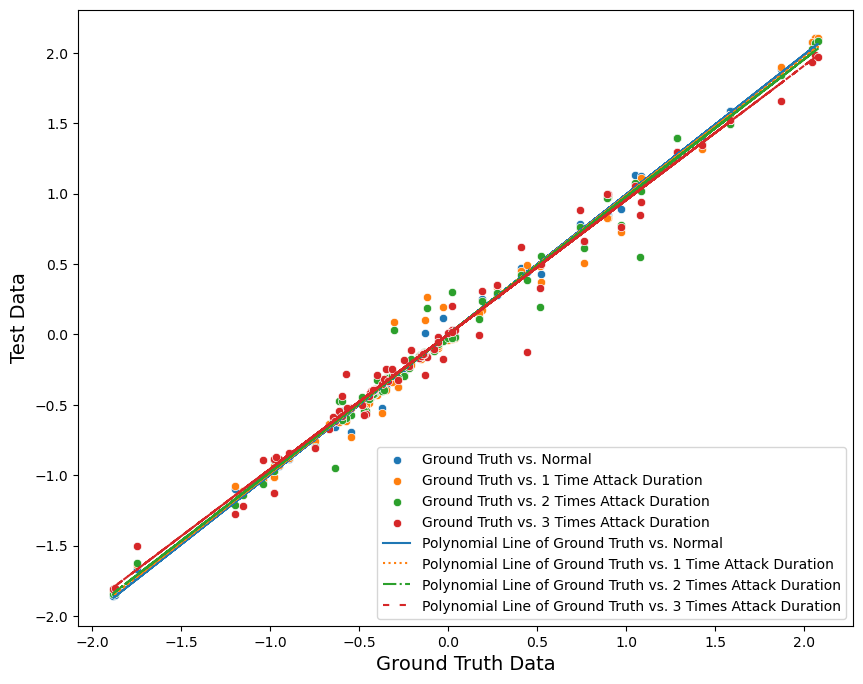

In [13]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns

#colors = sns.set_palette("tab10", n_colors=10)

fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_1_vertical, label="Ground Truth vs. Normal")
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_2_vertical, label="Ground Truth vs. 1 Time Attack Duration")
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_3_vertical, label="Ground Truth vs. 2 Times Attack Duration")
sns.scatterplot(x=df_pca_ground_truth_vertical, y=df_pca_sec_4_vertical, label="Ground Truth vs. 3 Times Attack Duration")
# plt.title(f"Pearson Correlation Coefficient Plot", fontsize=14)

# polynomial plot
z_gt_1 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_1_vertical, 1)
p_gt_1 = np.poly1d(z_gt_1)

z_gt_2 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_2_vertical, 1)
p_gt_2 = np.poly1d(z_gt_2)

z_gt_3 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_3_vertical, 1)
p_gt_3 = np.poly1d(z_gt_3)

z_gt_4 = np.polyfit(df_pca_ground_truth_vertical, df_pca_sec_4_vertical, 1)
p_gt_4 = np.poly1d(z_gt_4)


plt.plot(df_pca_ground_truth_vertical, p_gt_1(df_pca_ground_truth_vertical), linestyle='solid', label='Polynomial Line of Ground Truth vs. Normal')
plt.plot(df_pca_ground_truth_vertical, p_gt_2(df_pca_ground_truth_vertical), linestyle='dotted', label='Polynomial Line of Ground Truth vs. 1 Time Attack Duration')
plt.plot(df_pca_ground_truth_vertical, p_gt_3(df_pca_ground_truth_vertical), linestyle='dashdot', label='Polynomial Line of Ground Truth vs. 2 Times Attack Duration')
plt.plot(df_pca_ground_truth_vertical, p_gt_4(df_pca_ground_truth_vertical), linestyle='dashed',dashes=(3, 5), label='Polynomial Line of Ground Truth vs. 3 Times Attack Duration')

handles, labels = plt.gca().get_legend_handles_labels()

# Line1 = Line2D([0], [0], color='r', label='Polynomial of 1st Test Scenario')
# Line2 = Line2D([0], [0], color='g', label='Polynomial of 2nd Test Scenario')
# Line3 = Line2D([0], [0], color='b', label='Polynomial of 3rd Test Scenario')
# Line4 = Line2D([0], [0], color='k', label='Polynomial of 4th Test Scenario')

# Line5 = Line2D([0], [0], color='w', label=f'PCC 1st Test Scenario: {corr_gt_1:.4f}')
# Line6 = Line2D([0], [0], color='w', label=f'PCC 2nd Test Scenario: {corr_gt_2:.4f}')
# Line7 = Line2D([0], [0], color='w', label=f'PCC 3rd Test Scenario: {corr_gt_3:.4f}')
# Line8 = Line2D([0], [0], color='w', label=f'PCC 4th Test Scenario: {corr_gt_4:.4f}')

# handles.extend([Line1, Line2, Line3, Line4, Line5, Line6, Line7, Line8])
# handles.extend([Line5, Line6, Line7, Line8])

ax.legend(handles=handles, loc='lower right')
plt.xlabel('Ground Truth Data', fontsize=14)
plt.ylabel('Test Data', fontsize=14)


plt.show()